# SVHN Dataset 

** Preprocessing the 32 x 32 image datset **

   * Create a Startified 13% of data in Validation Set
   * Converting the Label 10's to 0's
   * Normalization of data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

## Loading Data .....

##### We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [2]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')


print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


Our training and testing data shape is 32, 32, 3, 73257 and 32, 32, 3, 26032 respectively. We will reverse the image arrays of the training and testing set as 73257,32, 32, 3 and 26032,32, 32, 3.

In [3]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


` This function used for displaying the image and also 
can be used for grayscale and RGB both`

In [4]:
def image_plotting(image, labels, rows, cols):
    """ Plotting images
    """
    fig, axes = plt.subplots(rows, cols)
    for i, ax in enumerate(axes.flat): 
        if image[i].shape == (32, 32, 3):
            ax.imshow(image[i])
        else:
            ax.imshow(image[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])


Plot some of the training images

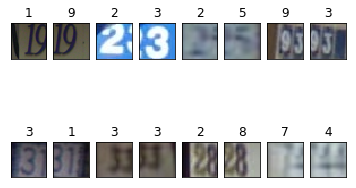

In [5]:
# Displaying some of the Training Image
image_plotting(X_train, y_train, 2, 8)

Plot some of testing set images

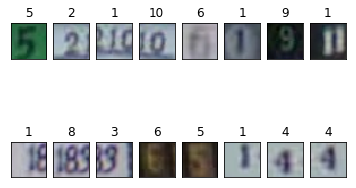

In [6]:
# Checking some of the Testing Image
image_plotting(X_test, y_test, 2, 8)

#### To check unique labels

In [7]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


All distributions have a positive skew, meaning that we have an underweight of higher values.

#### Converting Label 10 -> 0

In [8]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [9]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


### Splitting the Training to Train + Validation data

`Splitting to 20% in Val Set`
`Using random state to regenrate the whole Dataset in re-run`

We split our training data for training and validation of our model, where validation size will be **20%** of the training data.

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=7)

`Data in each Set`

In [11]:
y_train.shape, y_val.shape, y_test.shape

((58605,), (14652,), (26032,))

In [12]:
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (58605, 32, 32, 3) (58605,)
Validation set (14652, 32, 32, 3) (14652,)
Test set (26032, 32, 32, 3) (26032,)


In [28]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.callbacks import  TensorBoard
#Importing the CNN related layers 
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.utils import np_utils

tf.__version__


model = Sequential()
model.add(Convolution2D(128, [4, 4], input_shape=(32, 32, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, [4, 4]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, [4, 4]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64, [4, 4], padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])



# model = Sequential()
# model.add(Conv2D(128, (5, 5), input_shape=(32,32 ,1), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation="relu"))
# model.add(Dense(10, activation="softmax"))

In [30]:
# model.compile(optimizer='adam', 
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 128)       6272      
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        131136    
_________________________________________________________________
activation_14 (Activation)   (None, 29, 29, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
__________

In [32]:
model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size = 128, epochs= 10, verbose= 1)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 1836s 31ms/step - loss: 0.8290 - acc: 0.7480 - val_loss: 0.5680 - val_acc: 0.8238
Epoch 2/10
58605/58605 [==============================] - 1699s 29ms/step - loss: 0.4346 - acc: 0.8663 - val_loss: 0.3236 - val_acc: 0.9044
Epoch 3/10
58605/58605 [==============================] - 1782s 30ms/step - loss: 0.3643 - acc: 0.8888 - val_loss: 0.3132 - val_acc: 0.9068
Epoch 4/10
58605/58605 [==============================] - 1814s 31ms/step - loss: 0.3238 - acc: 0.9022 - val_loss: 0.2921 - val_acc: 0.9108
Epoch 5/10
58605/58605 [==============================] - 2058s 35ms/step - loss: 0.2971 - acc: 0.9093 - val_loss: 0.2819 - val_acc: 0.9198
Epoch 6/10
58605/58605 [==============================] - 1785s 30ms/step - loss: 0.2730 - acc: 0.9164 - val_loss: 0.2479 - val_acc: 0.9289
Epoch 7/10
58605/58605 [==============================] - 1640s 28ms/step - loss: 0.2518 - acc: 0.9231 - val_l

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test Loss:', test_loss)

26032/26032 [==============================] - 174s 7ms/step
Test accuracy: 0.9187922556853104
Test Loss: 0.2854801995728964


In [45]:
print('Test accuracy: {0:.2f}'.format(test_acc))
print('Test loss: {0:.2f}'.format(test_loss))

Test accuracy: 0.92
Test loss: 0.29


## Evaluate & Prediction

In [49]:
predictions = model.predict(X_test)

In [101]:
predictions[1]

array([5.6172627e-08, 3.3067536e-06, 9.9993074e-01, 5.4110591e-05,
       4.3469272e-06, 3.5212310e-07, 1.2727788e-06, 3.6015683e-06,
       9.1889353e-07, 1.2580454e-06], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different labels. We can see which label has the highest confidence value:

In [102]:
np.argmax(predictions[1])

2

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [100]:
y_test[0]

2

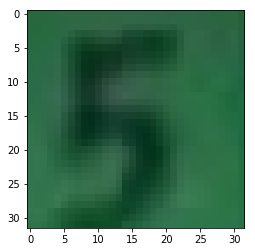

In [85]:
plt.imshow(X_test[0])

We can graph this to look at the full set of 10 channels

In [92]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [104]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

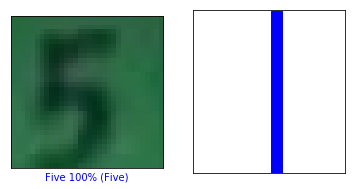

In [105]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

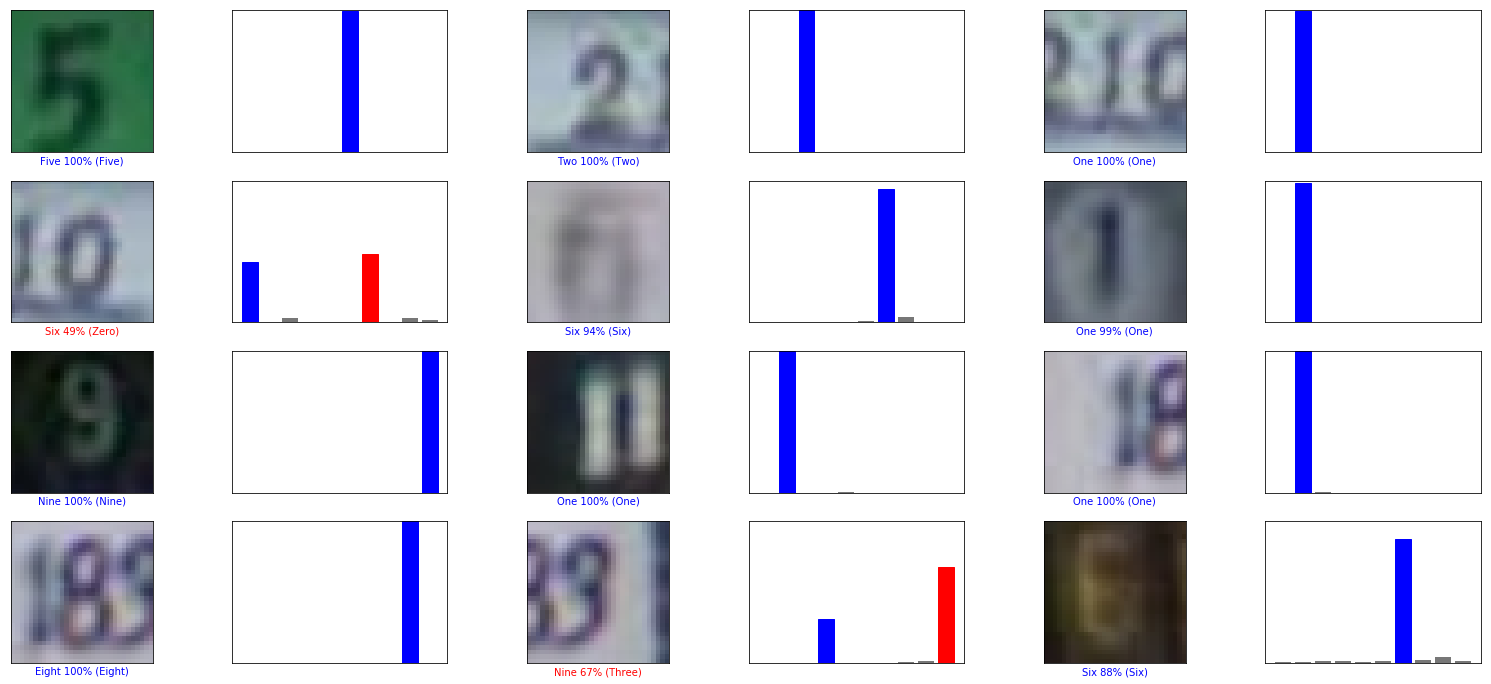

In [111]:
num_rows = 4
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(3*3*num_cols, 3*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  y_test)
plt.show()

## Storing the model into h5 file

In [112]:
model.save('SVHN.h5')